<h2><center>Applied AI Data Science Project</h2></center>
<center>
<h4>Dhara Patel</h4>  
</center>


<h3>Importing Packages and Libraries</h3>

In [1]:
!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

  Running command git clone --filter=blob:none --quiet https://github.com/scikit-multiflow/scikit-multiflow 'C:\Users\patel\AppData\Local\Temp\pip-req-build-21xpknhf'
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      To install scikit-multiflow first install numpy.
      For example, using pip:
      $ pip install -U numpy
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Cloning https://github.com/scikit-multiflow/scikit-multiflow to c:\users\patel\appdata\local\temp\pip-req-build-21xpknhf
  Resolved https://github.com/scikit-multiflow/scikit-multiflow to commit d073a706b5006cba2584761286b7fa17e74e87be
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from keras import Input # for instantiating a keras tensor

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from skmultiflow.drift_detection.adwin import ADWIN
from matplotlib import pyplot

<h3>Reading data from the csv files</h3>

In [ ]:
data = pd.read_csv("telco-customer-churn.csv")

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Date,tenure,MultipleLines
0,0002-ORFBO,Female,0,Yes,Yes,Yes,DSL,No,No,No,...,No,One year,Yes,Electronic Check,65.6,593.30,No,"01 Jan, 2010",9,No
1,0003-MKNFE,Male,0,No,No,Yes,No,No internet service,No internet service,No internet service,...,No internet service,Month-to-month,Yes,Mailed Check,59.9,542.40,No,"01 Jan, 2010",9,Yes
2,0004-TLHLJ,Male,0,No,No,Yes,DSL,No,No,No,...,No,Month-to-month,Yes,Credit card (automatic),73.9,280.85,Yes,"01 Jan, 2010",4,No
3,0011-IGKFF,Male,1,Yes,No,Yes,DSL,No,No,No,...,No,Month-to-month,Yes,Credit card (automatic),98.0,1237.85,Yes,"02 Jan, 2010",13,No
4,0013-EXCHZ,Female,1,Yes,No,Yes,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Electronic Check,83.9,267.40,Yes,"03 Jan, 2010",3,No


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


**<h2>Task 1. Data Exploration and preprocessing</h2>**

**<h4>a. Extract the numerical and categorical features from the dataset and build the data quality report.</h4>**

1. Data Quality Report

Following these Steps to create the Data Quality Report:

1.   Find all the types **Data Types** 
2.   Count the **Missing Values**
3.   Check All the **Unique Values** in the Dataset
4.   Find the **Maximum Value**
5.   Find the **Minimum Value**


In [ ]:
def generateDataQualityReport(dataFrame):

  datatypes = pd.DataFrame(dataFrame.dtypes,columns=['Data type'])

  missing_value_count = pd.DataFrame(dataFrame.isnull().sum(),columns=['Missing values'])
  
  unique_value_count = pd.DataFrame( columns=['Unique values'])
  minimum_value = pd.DataFrame(columns=['Minimum'])
  maximum_value = pd.DataFrame( columns=['Maximum'])

  for column in list(dataFrame.columns.values):
    unique_value_count.loc[column] = [dataFrame[column].value_counts().nunique()] 
    minimum_value.loc[column] = [dataFrame[column].min()]
    maximum_value.loc[column] = [dataFrame[column].max()]

  data_quality_report = datatypes.join(missing_value_count). join(unique_value_count).join(maximum_value).join(minimum_value)
  print(data_quality_report)

**Data quality report : Numerical features**

In [ ]:
print("Data quality report : Numerical features")
numerical_features = data.select_dtypes(exclude=['object']).columns.tolist()
print(f"Numerical features: {numerical_features}")
numerical_data = pd.DataFrame(data, columns= numerical_features)
generateDataQualityReport(numerical_data)

Data quality report : Numerical features
Numerical features: ['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'tenure']
               Data type  Missing values Unique values Maximum Minimum
SeniorCitizen      int64               0             2       1       0
MonthlyCharges   float64               0            37  118.75   18.25
TotalCharges     float64              11            10  8684.8    18.8
tenure             int64               0            48      72       0


**Data quality report : Categorical features**

In [ ]:
print("Data quality report : Categorical features")
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features: {categorical_features}")
categorical_data = pd.DataFrame(data, columns= categorical_features)
generateDataQualityReport(categorical_data)

Data quality report : Categorical features
Categorical features: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'Date', 'MultipleLines']
                 Data type  Missing values Unique values       Maximum  \
customerID          object               0             1    9995-HOTOH   
gender              object               0             2          Male   
Partner             object               0             2           Yes   
Dependents          object               0             2           Yes   
PhoneService        object               0             2           Yes   
InternetService     object               0             3            No   
OnlineSecurity      object               0             3           Yes   
OnlineBackup        object               0             3           Yes  

**Data quality report of continuous features**

In [ ]:
print("Data quality report of continuous features")
continuous_cols = data.select_dtypes(include=['object']).columns.tolist()
continuous_data = pd.DataFrame(data, columns= continuous_cols)
generateDataQualityReport(continuous_data)

Data quality report of continuous features
                 Data type  Missing values Unique values       Maximum  \
customerID          object               0             1    9995-HOTOH   
gender              object               0             2          Male   
Partner             object               0             2           Yes   
Dependents          object               0             2           Yes   
PhoneService        object               0             2           Yes   
InternetService     object               0             3            No   
OnlineSecurity      object               0             3           Yes   
OnlineBackup        object               0             3           Yes   
DeviceProtection    object               0             3           Yes   
TechSupport         object               0             3           Yes   
StreamingTV         object               0             3           Yes   
StreamingMovies     object               0             3           Ye

**<h4>b. Identify data quality issues and build the data quality plan.</h4>**

**1.	Identifying and handling the missing values:**
The data gathered frequently encounter the issue of missing data. When a feature in a dataset doesn't have a value, this issue arises.

<br>

Here we have found the count of missing values in the dataset


In [ ]:
missing_value_count = pd.DataFrame(data.isnull().sum(),columns=['Missing values'])
missing_value_count

,Missing values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
PhoneService,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


As we can see that TotalCharges Feature has 11 missing values

**2.	Encoding the categorical data:**
We convert text data into numeric data during encoding. The process of encoding categorical data entails converting categorical data to numeric data.


In [ ]:
oe = OrdinalEncoder()
oe.fit(data)
data_num = oe.transform(data)

**3.	Removing outliers:**
Finding and dealing with outliers is one of the most crucial processes in data preparation since they can have a detrimental impact on statistical analysis and the training of a machine learning algorithm, leading to reduced accuracy.

<br>

We have used here **Boxplots** for the detection of the outliers.


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


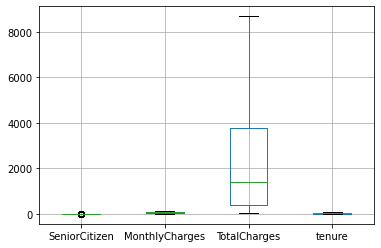

In [ ]:
data.boxplot()

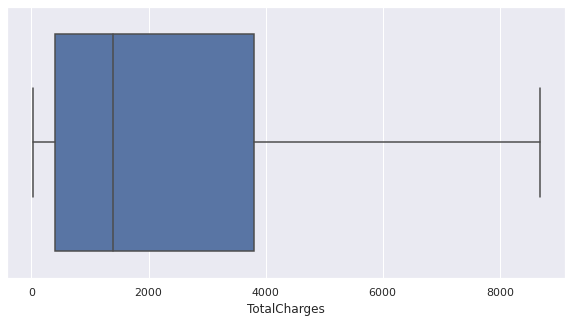

In [ ]:
# Finding Outliers for Preprocessing
sns.set(rc = {'figure.figsize':(10,5)})

sns.boxplot(x=data['TotalCharges'])

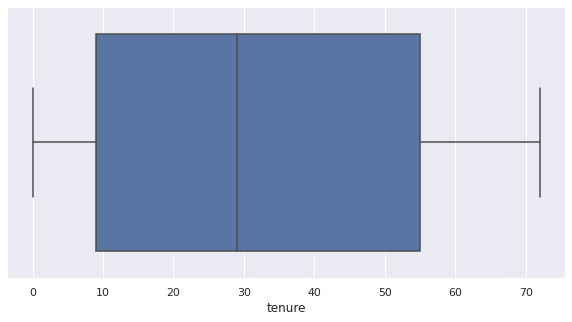

In [ ]:
sns.boxplot(x=data['tenure'])

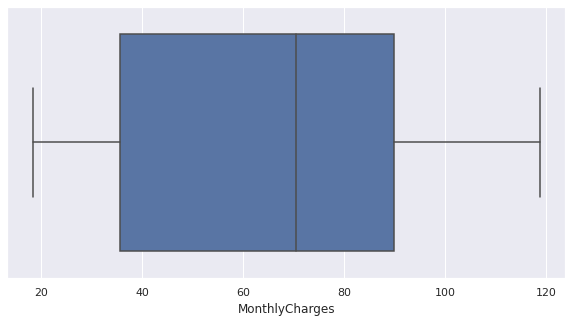

In [ ]:
sns.boxplot(x=data['MonthlyCharges'])

Here we have found no outliers

**<h4>c. Preprocess your data according to the data quality plan</h4>**

Data Quality Issues:
<br>

Total charges has 11 missing values
<br>

Data quality plan:
<br>

Replace missing values by Median

In [ ]:
#Preprocessing data according to the data quality plan

median = data['TotalCharges'].median()
data['TotalCharges'].fillna(median, inplace=True)

In [ ]:
missing_value_count = pd.DataFrame(data.isnull().sum(),columns=['Missing values'])
missing_value_count

,Missing values
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
PhoneService,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


As we can see now there are no Missing Values in the Dataset

**<h4>d. Explore the data set to find patterns in the data (e.g. correlation, trends, etc) and potentially form some hypotheses.</h4>**

Correlation Heatmap

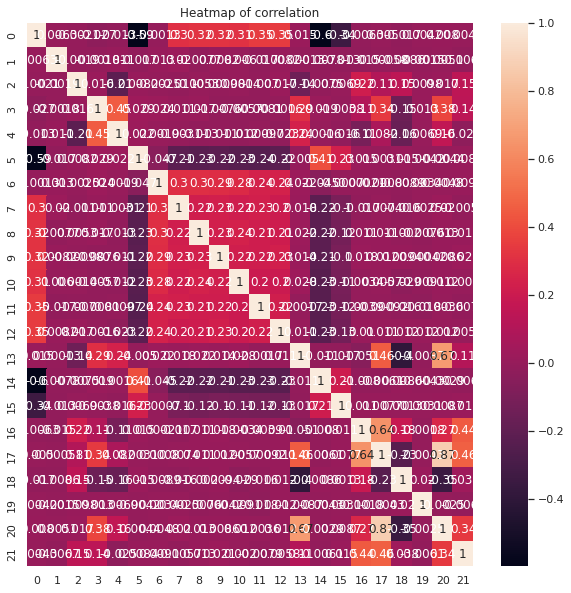

In [ ]:
plt.subplots()
sns.set(rc = {'figure.figsize':(20,10)})
heatmap = sns.heatmap(pd.DataFrame(data_num).corr(), annot=True)
heatmap.set_title('Heatmap of correlation')
# plt.figure(figsize=(30,30))
plt.show()

**<h4>Part 1. d. i. Customer Account Information: Consider the tenure, and contract variables, and then plot graphs and describe your observations.</h4>**

Text(0.5, 1.0, 'Number of Customers by Contract Type')

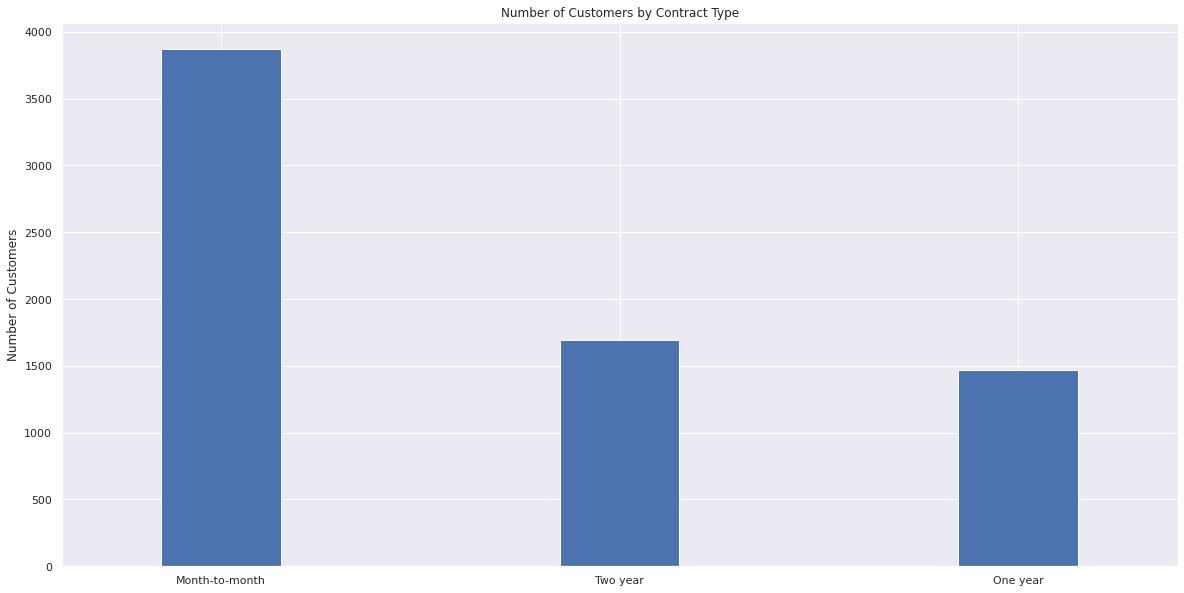

In [ ]:
ax = data['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

This graph illustrates the prevalence of month-to-month contracts among customers. Users in the 1 year and 2 year contracts are roughly equally distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Number of Customers by their tenure')

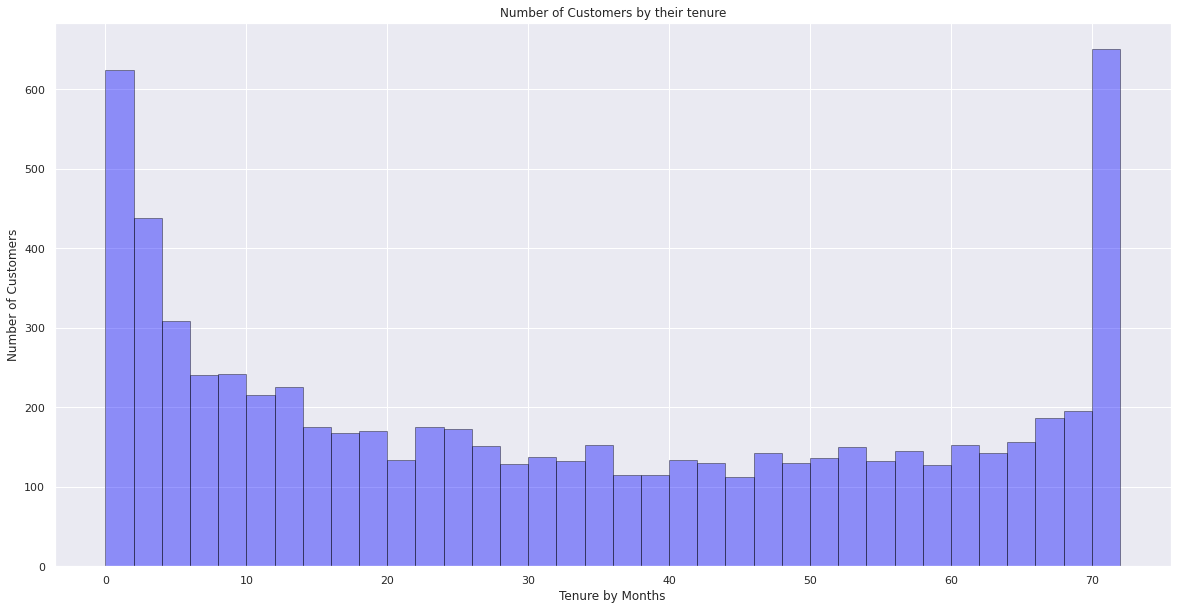

In [ ]:
ax = sns.distplot(data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure by Months')
ax.set_title('Number of Customers by their tenure')

According to the above histogram, many customers have just been with the telecom industry for a month or less, while many others have been with them for almost 72 months. This can be due to different contracts held by distinct customers. Therefore, it may be easier or harder for the consumers to stay with the telecom firm based on the contract they have.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

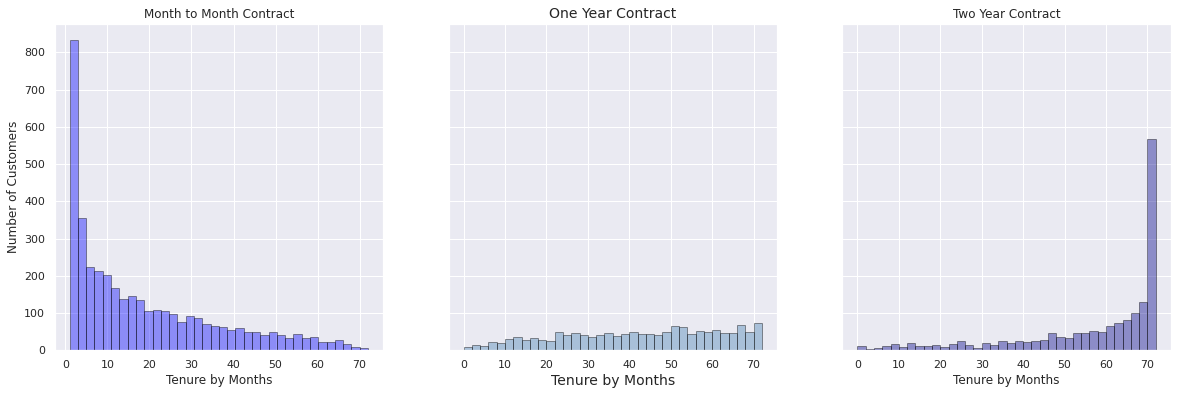

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'blue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure by Months')
ax.set_title('Month to Month Contract')

ax = sns.distplot(data[data['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure by Months',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(data[data['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure by Months')
ax.set_title('Two Year Contract')

Interestingly, the majority of monthly contracts only last a few weeks to a few months, although two-year contracts often continue for over 70 months. This demonstrates that clients who sign lengthier contracts are more devoted to the business and have a propensity to stick with it.




**<h4>Part 1. d. ii. Services that each customer has signed up for—phone, multiple lines, internet, online security, online backup, device protection,
tech support, then visualize plots and describe your observations.</h4>**

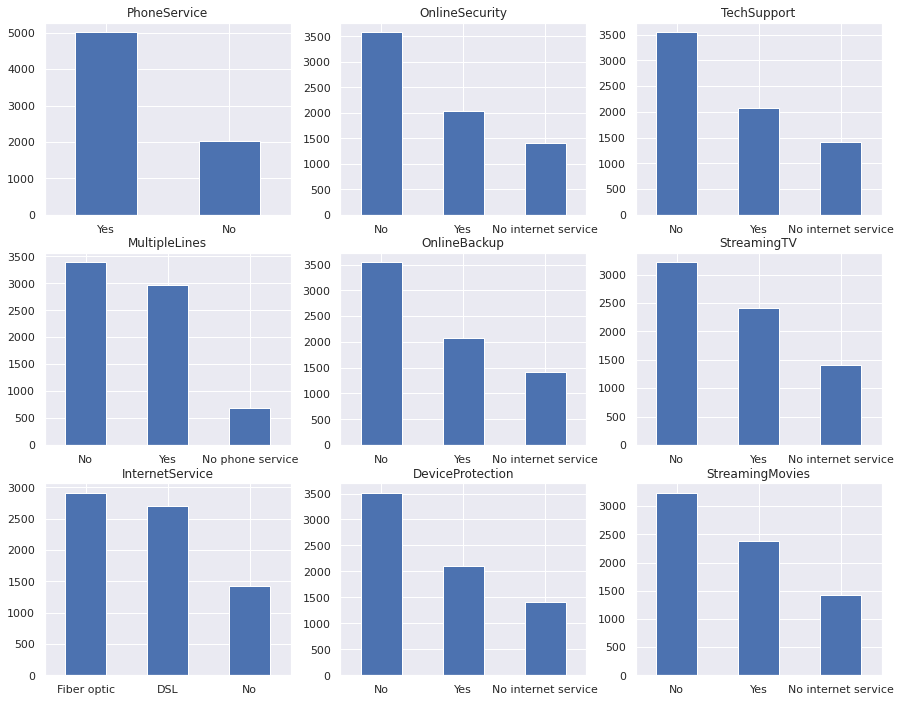

In [ ]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

From the above bar graphs, we can see the distribution of various services used by customers.

1.   We can observe that most of the customers haven't opted for the Online Security Service.
2.   Moreover, most of the customers haven't opted for Tech Support as well Service.
3. Almost there is equal distribution of Multiple Lines services.
4.  Mostly 50% of people haven't Device Protection.


**<h2>2. Build a baseline model to predict customer churn. Using the CSV file, split the dataset into training(40%), validation(30%), and test(30%) splits.</h2>**

In [ ]:
X = data.loc[:, ~data.columns.isin(['Churn','customerID'])].values
X = X.astype(str)
y = data.Churn.values

In [ ]:
# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4)

# Now since we want the valid and test size to be equal (30% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5) 

**<h4> a. Explain what the task you’re solving is (e.g., supervised x unsupervised,
classification x regression x clustering or similarity matching x, etc).</h4>**

We are dealing with supervised learning problems here. In supervised learning, models are taught to generate the desired outputs using a training set.  The right inputs and outputs are present in this training dataset, allowing the model to improve over time. The algorithm's accuracy is evaluated using the loss function, and iterations are carried out until the error is sufficiently decreased.

<br>

Regression is used to understand the connection between the dependent and independent variables. A dependent variable is the primary item you are attempting to comprehend or predict. You expect that independent factors will have an effect on your dependent variable.

<br>

Here we are solving classification problem using Logistic Regression 

In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(np.concatenate((X_train, X_test), axis=0))
    X_train_enc = oe.transform(X_train)
    # oe.fit(X_test)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare target
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

**<h4>b. Use a feature selection method to select the features to build a model.</h4>**

Here we have used common method for categorical feature selection that work with a categorical (class) goal variable and categorical input data

Here we have used **Chi-Squared Statistic**.

**Feature Selection Using Chi-Squared:**

A test for independence between categorical variables is an example of Pearson's chi-squared statistical hypothesis test.

The characteristics that are unrelated to the target variable can be eliminated from the dataset using the test results as a guide for feature selection.

The chi2() function in the scikit-learn machine library offers a chi-squared test implementation. Using the SelectKBest class, this method may be used in a feature selection strategy to choose the top k most important characteristics (biggest values).

Feature 0: 0.006391
Feature 1: 40.780018
Feature 2: 25.117821
Feature 3: 35.494088
Feature 4: 0.083789
Feature 5: 0.966074
Feature 6: 1.398590
Feature 7: 0.159499
Feature 8: 6.571308
Feature 9: 0.704396
Feature 10: 0.188731
Feature 11: 2.396461
Feature 12: 435.102966
Feature 13: 0.413711
Feature 14: 0.014122
Feature 15: 19776.485451
Feature 16: 1750.346623
Feature 17: 483.440938
Feature 18: 3196.111134
Feature 19: 5.024712


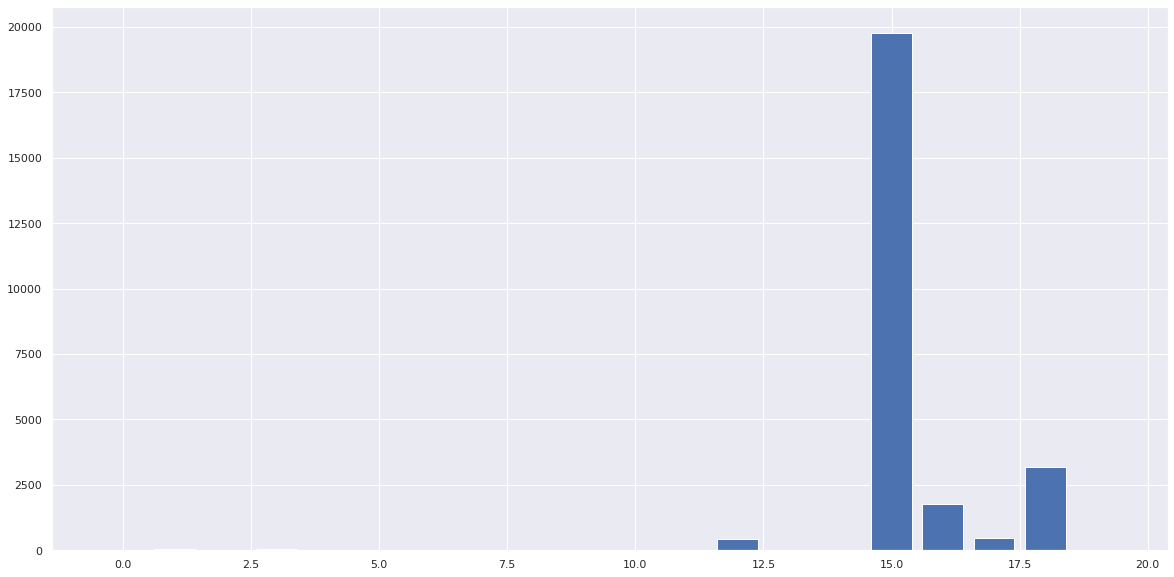

In [ ]:
fs = SelectKBest(score_func=chi2, k=6)
fs.fit(X_train_enc, y_train_enc)

X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# selecting evaluation metric: confusion matrix and classification report

**<h4>c. Select the evaluation metric. Justify your choice.</h4>**

Here we have used Confusion Matrix and Classification report as evaluation matrix

<br>

**Confusion Matrix:**
A confusion matrix, sometimes referred to as an error matrix, is a condensed table used to evaluate how well a classification model performs. Count values are used to describe the number of accurate and inaccurate predictions for each class.



*   True positive (TP): correct positive prediction
*   False positive (FP): incorrect positive prediction
*   True negative (TN): correct negative prediction
*   False negative (FN): incorrect negative prediction

<br>

**Classification Report**
sklearn classification_report() returns precision, recall and F1-score for each class. 

Metrics for the evaluation of a classification model

**Accuracy:**
The accuracy returns the proportion of correct predictions.

**Precision:**
The precision returns the proportion of true positives among all the values predicted as positive.

**Recall:**
The recall returns the proportion of positive values correctly predicted.

**F1-score:**
The f1-score is the harmonic mean of precision and recall. It is often used to compare classifiers.

F1-score = (2 x Precision x Recall)/(Precision + Recall)


**<h4>d. Perform hyperparameter tuning if applicable.</h4>**

We will use the grid search. 

The **Grid Search (GS)** strategy is the most fundamental and simple method for optimising hyperparameters, aside from actively looking for suitable candidate values. For each hyperparameter, a list of potential values is established and assessed. The term "grid" refers to the combination of all potential candidates within all necessary hyperparameters into a figurative grid. The combination producing the best performance is then chosen, preferably after being tested in a validation set.

In [ ]:
param_grid = {
    'C': [1.0,0.1,0.01],
    'solver': ['newton-cg','lbfgs','liblinear'],
    'penalty': ['l2'],
}
grid = GridSearchCV(LogisticRegression(), param_grid, refit = True, verbose = 3)
grid.fit(X_train_fs, y_train_enc)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.729 total time=   0.3s
[CV 2/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.770 total time=   0.3s
[CV 3/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.3s
[CV 4/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.3s
[CV 5/5] END C=1.0, penalty=l2, solver=newton-cg;, score=0.762 total time=   0.2s
[CV 1/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.729 total time=   0.1s
[CV 2/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.757 total time=   0.0s
[CV 3/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.773 total time=   0.0s
[CV 4/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.0s
[CV 5/5] END ...C=1.0, penalty=l2, solver=lbfgs;, score=0.764 total time=   0.1s
[CV 1/5] END C=1.0, penalty=l2, solver=liblinear;, score=0.725 total time=   0.0s
[CV 2/5] END C=1.0, penalty=l2, solver=libl

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 4/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 5/5] END C=0.1, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.3s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.713 total time=   0.0s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.759 total time=   0.0s
[CV 3/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s
[CV 4/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.0s
[CV 5/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.1s
[CV 1/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.722 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.770 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.774 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 5/5] END C=0.1, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 1/5] END C=0.01, 

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV 3/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.3s
[CV 4/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.789 total time=   0.3s
[CV 5/5] END C=0.01, penalty=l2, solver=newton-cg;, score=0.766 total time=   0.3s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.734 total time=   0.1s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.773 total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.1s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.789 total time=   0.1s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.1s
[CV 1/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.725 total time=   0.0s
[CV 2/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.762 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.767 total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV 4/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.771 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=3)

> grid.best_params — give best parameters of our model.

> It giving best parameter of the model.



In [ ]:
best_param = grid.best_params_
print(best_param)

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}



> Training the model using best hyper parameter on training data



**<h4>e. Train and evaluate your model on test data.</h4>**

In [ ]:
model_lr = LogisticRegression(solver=best_param['solver'],penalty=best_param['penalty'],C=best_param['C'], max_iter=1000)
model_lr.fit(X_train_fs, y_train_enc)

# testing the model on test data
predicted = model_lr.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, predicted)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 76.81




> Evaluting the Model with Confusion Matrix and Classification Report as explained earlier



In [ ]:
# evaluating the model

matrix = confusion_matrix(y_test_enc, predicted)
print(f"Confusion Matrix:\n{matrix}")

report = classification_report(y_test_enc, predicted)
print(f"\nClassification Report:\n{report}")

Confusion Matrix:
[[1475   93]
 [ 397  148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1568
           1       0.61      0.27      0.38       545

    accuracy                           0.77      2113
   macro avg       0.70      0.61      0.62      2113
weighted avg       0.74      0.77      0.73      2113



**<h4>f. How do you make sure that your model is not overfitting the data?</h4>**

1.   We have Validated the data through data quality report and fixed all the issues we found
2.   We Used KBestMeans method for feature selection
3.   From the learning curve below also, we can confirm that model is not overfitting.
4.   Moreover we have used the hyperparameters tuning to pick the best parameters
5. 
One method to prevent overfitting is to use additional data during training. These elements make it easy for algorithms to detect the signal and cut down on mistakes more accurately. Cross-validation is an efficient overfitting defense.
6. 
Using the initial training data, make several little train-test splits. Use these divides to adjust the model. 
7.
Cross-validation is used to adjust hyperparameters using only the data from the original training batch. As a consequence, while selecting the final model, we may keep using our test set as a real unknown dataset.

How we detected overfitting:

For model having overfitting, there is a large gap between training and validation accuracy. 
Also, training accuracy may come to be more than desired accuracy.

**<h4>g. Plot the learning curve. What can you conclude from this plot?<h4>**

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


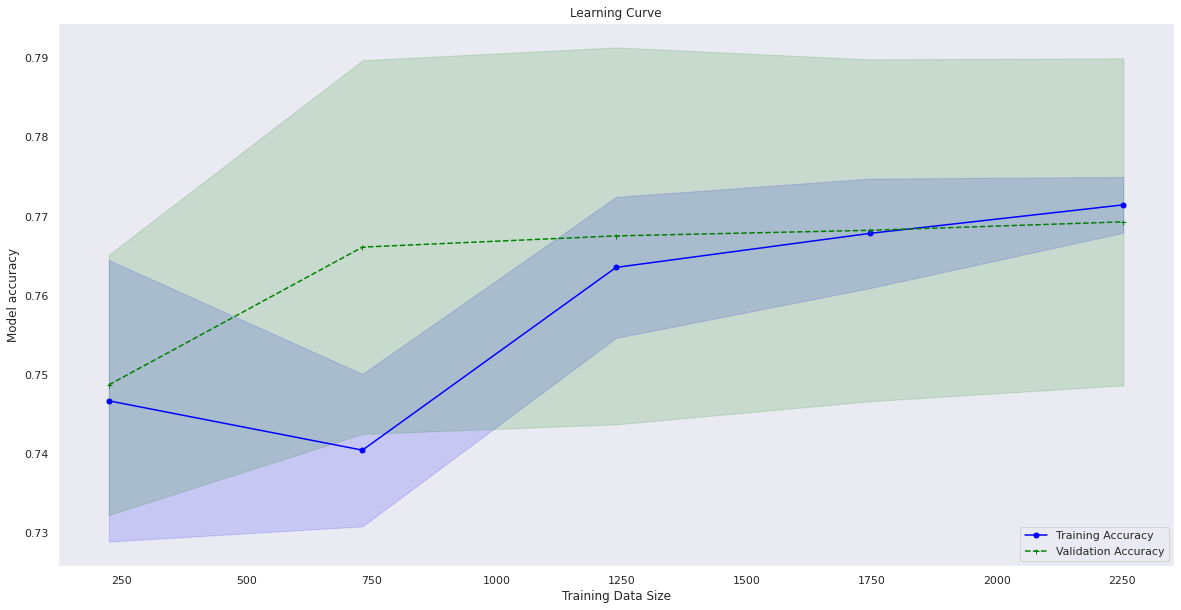

In [ ]:
train_sizes,train_scores,test_scores = learning_curve(model_lr,X_train_fs, y_train_enc,scoring="accuracy")

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

([0.2313167259786477,
  0.25932504440497334,
  0.2319526627218935,
  0.23623445825932504,
  0.2294034090909091,
  0.23905325443786982,
  0.2374429223744292,
  0.23124722592099423,
  0.23155818540433926,
  0.22790202342917998],
 [0.24798864174159962,
  0.24136299100804542,
  0.24136299100804542,
  0.24136299100804542,
  0.2375769048745859,
  0.2389966871746332,
  0.23615712257453858,
  0.2375769048745859,
  0.23663038334122102,
  0.23615712257453858])

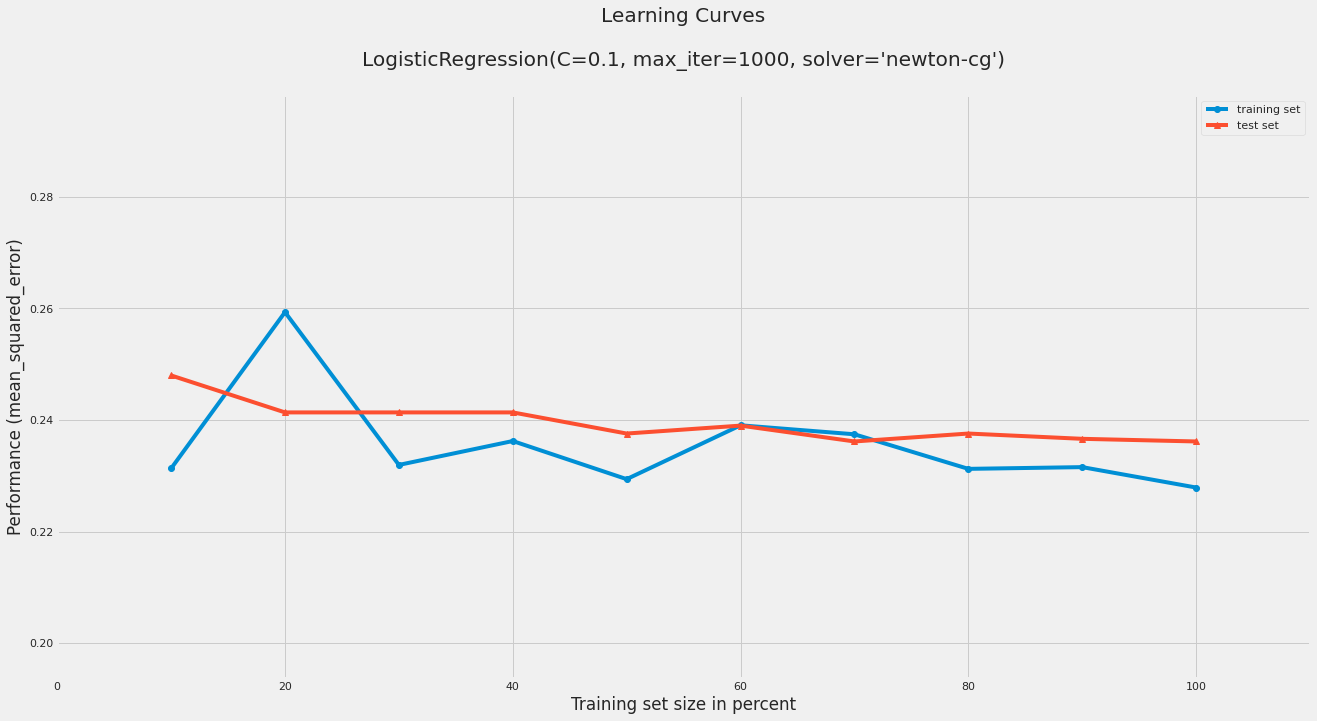

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train_enc, y_train_enc, X_test_enc, y_test_enc, model_lr, scoring='mean_squared_error')

Conclusion from the plot:
> For Data less than 750, the model is getting overfitted.

> In machine learning, a learning curve (or training curve) plots the optimal value of a model's loss function for a training set against this loss function evaluated on a validation data set with same parameters as produced the optimal function. Form the curve, we can say that our model is performing good as they are getting closure to each other so we can say that learning rate is good.





**<h4>h. Analyze and discuss model performance.</h4>**

Overall performance of the Logistic Regression algorithm on the data is good. Initially, it was overfit on the data. After tuning the hyperparameters value, it fits the model well. The accuracy is around 77% on training set, the performance of the model remains approximately same on validation set, also. The accuracy for the validation is around 76.5 %.

**<h2>3. Build a NN model to predict customer churn</h2>**

**<h4>a. Explain what the task you’re solving is (e.g., supervised x unsupervised,
classification x regression x clustering or similarity matching x, etc).</h4>**

Here we are using Neural Networks, which is a supervised learning algorithm.

<br>

We are dealing with supervised learning problems here. In supervised learning, models are taught to generate the desired outputs using a training set.  The right inputs and outputs are present in this training dataset, allowing the model to improve over time. The algorithm's accuracy is evaluated using the loss function, and iterations are carried out until the error is sufficiently decreased.


In [ ]:
oe = OrdinalEncoder()
oe.fit(np.concatenate((X_train, X_test,X_val), axis=0))

X_train_enc = oe.transform(X_train)
X_val_enc = oe.transform(X_val)
X_test_enc = oe.transform(X_test)

le = LabelEncoder()
le.fit(y_val)
y_val_enc = le.transform(y_val)

**<h4>b. Use a feature selection method to select the features to build a model.</h4>**

Here we have used common method for categorical feature selection that work with a categorical (class) goal variable and categorical input data

Here we have used **Chi-Squared Statistic**.

**Feature Selection Using Chi-Squared:**

A test for independence between categorical variables is an example of Pearson's chi-squared statistical hypothesis test.

The characteristics that are unrelated to the target variable can be eliminated from the dataset using the test results as a guide for feature selection.

The chi2() function in the scikit-learn machine library offers a chi-squared test implementation. Using the SelectKBest class, this method may be used in a feature selection strategy to choose the top k most important characteristics (biggest values).

In [ ]:
def select_features(X_train, y_train, X_test, X_val):
    fs = SelectKBest(score_func=f_regression, k=7)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    X_val_fs = fs.transform(X_val)
    return X_train_fs, X_test_fs, X_val_fs, fs

X_train_fs, X_test_fs, X_val_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc, X_val_enc)


**<h4>c. Select the evaluation metric. Justify your choice.</h4>**

Here we have used Classsification report as evalution matrix

<br>

**Classification Report**
sklearn classification_report() returns precision, recall and F1-score for each class. 

Metrics for the evaluation of a classification model

**Accuracy:**
The accuracy returns the proportion of correct predictions.

**Precision:**
The precision returns the proportion of true positives among all the values predicted as positive.

**Recall:**
The recall returns the proportion of positive values correctly predicted.

**F1-score:**
The f1-score is the harmonic mean of precision and recall. It is often used to compare classifiers.

F1-score = (2 x Precision x Recall)/(Precision + Recall)


**<h4>d. Perform hyperparameter tuning if applicable.</h4>**

We have not performed hyperparameter tuning as model was already giving accurate results.

**<h4>e. Train and evaluate your model on test data.</h4>**

In [ ]:
model_nn = Sequential(name="NN") 
model_nn.add(Input(shape=(7,), name='Input-Layer')) 
model_nn.add(Dense(2, activation='softplus', name='Hidden-Layer')) 
model_nn.add(Dense(1, activation='sigmoid', name='Output-Layer'))

model_nn.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['Accuracy', 'Precision', 'Recall'])

model_nn.fit(X_train_fs, y_train_enc, epochs=10, validation_data=(X_val_fs, y_val_enc))

Epoch 1/10
89/89 [==============================] - 2s 7ms/step - loss: 42.9723 - Accuracy: 0.7114 - precision: 0.2784 - recall: 0.0743 - val_loss: 34.4155 - val_Accuracy: 0.6725 - val_precision: 0.2727 - val_recall: 0.0955
Epoch 2/10
89/89 [==============================] - 0s 4ms/step - loss: 20.6035 - Accuracy: 0.6493 - precision: 0.1986 - recall: 0.1183 - val_loss: 11.8644 - val_Accuracy: 0.5665 - val_precision: 0.1866 - val_recall: 0.1591
Epoch 3/10
89/89 [==============================] - 0s 3ms/step - loss: 4.0372 - Accuracy: 0.3880 - precision: 0.1778 - recall: 0.3783 - val_loss: 0.7462 - val_Accuracy: 0.2712 - val_precision: 0.2439 - val_recall: 0.7521
Epoch 4/10
89/89 [==============================] - 0s 3ms/step - loss: 0.7197 - Accuracy: 0.2488 - precision: 0.2280 - recall: 0.8006 - val_loss: 0.7048 - val_Accuracy: 0.2783 - val_precision: 0.2537 - val_recall: 0.8007
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.6934 - Accuracy: 0.5240 - precisio



> Evaluting the Model with Classification Report as explained earlier



In [ ]:
pred_labels_tr = (model_nn.predict(X_train_fs) > 0.5).astype(int)
pred_labels_te = (model_nn.predict(X_test_fs) > 0.5).astype(int)

print('-------------------- Model Summary --------------------')
model_nn.summary()

print('\n\n-------------------- Weights and Biases --------------------')
for layer in model_nn.layers:
    print("\nLayer: ", layer.name) 
    print("Kernels (Weights): ", layer.get_weights()[0]) 
    print("Biases: ", layer.get_weights()[1]) 
    
print('\n\n---------- Evaluation on Training Data ----------')
print(classification_report(y_train_enc, pred_labels_tr))

print('\n\n---------- Evaluation on Test Data ----------')
print(classification_report(y_test_enc, pred_labels_te))

-------------------- Model Summary --------------------
Model: "NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer (Dense)        (None, 2)                 16        
                                                                 
 Output-Layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


-------------------- Weights and Biases --------------------

Layer:  Hidden-Layer
Kernels (Weights):  [[-0.03450285 -0.837464  ]
 [-0.5571291   0.52556   ]
 [ 0.34638748 -0.55085105]
 [-0.31879133 -0.5443139 ]
 [ 0.7036434  -0.18933769]
 [-0.00268453 -0.82827985]
 [-0.69350356  0.03424389]]
Biases:  [-0.21882032 -0.13389254]

Layer:  Output-Layer
Kernels (Weights):  [[-0.98383695]
 [ 1.1423876 ]]
Biase

**<h4>f. How do you make sure that your model is not overfitting the data?<h4>**

Following is the way we can make sure not to overfit our model:

1. By Simplifying the model we can decrease the complexity of the model which can help us to not overfit.
2. By Early Stopping our model will run limited time and it will not overfit.
3. By Use Data Augmentation means increasing the size of the training data.
4. We can aslo do the regularization or use the dropouts to make sure not to overfit.

**<h4>g. Plot the learning curve. What can you conclude from this plot?<h4>**

89/89 [==============================] - 0s 2ms/step - loss: 0.5885 - Accuracy: 0.7419 - precision: 0.5000 - recall: 0.0014


([0.2149761737940011,
  0.21337045741093352,
  0.21109050539740476,
  0.20864479553409265,
  0.207149018932443,
  0.20682882601007374,
  0.2039154765621661,
  0.20319876943440957,
  0.20066615772591484,
  0.19817345704549874],
 [0.2113364219936925,
  0.21063166110166645,
  0.20954622909608367,
  0.20811341583536147,
  0.20650497816438934,
  0.20486681050602715,
  0.20306174264841031,
  0.20132447522456218,
  0.19963077836771434,
  0.1979569675925823])

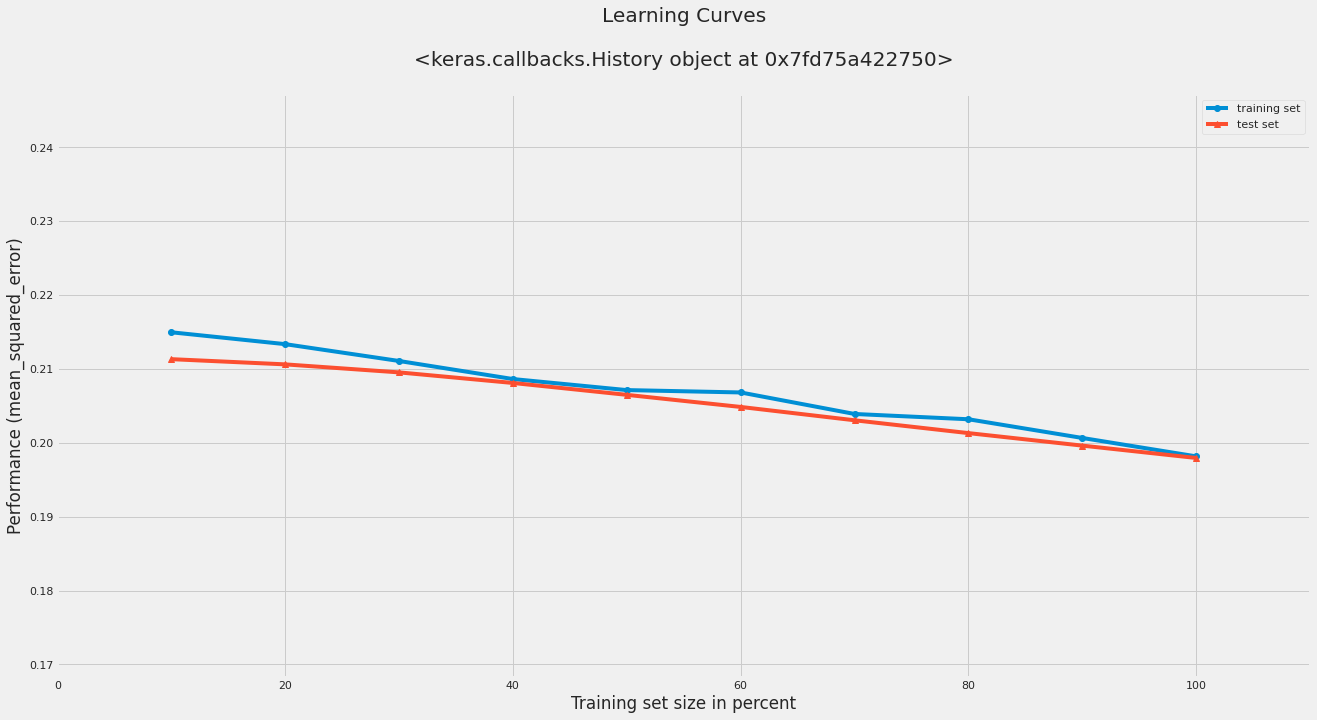

In [ ]:
from mlxtend.plotting import plot_learning_curves
plot_learning_curves(X_train_fs, y_train_enc, X_test_fs, y_test_enc, model_nn, scoring='mean_squared_error')

In machine learning, a learning curve (or training curve) plots the optimal value of a model's loss function for a training set against this loss function evaluated on a validation data set with same parameters as produced the optimal function. From the curve, we can say that model is running well and learning rate is improving with the time.



**<h4>h)	Analyze and discuss model performance.<h4>**

Overall performance of the Single feed Neural Network algorithm on the data is good. The accuracy is around 75% on training set, the performance of the model remains approximately same on validation set, also. Moreover, evaluation metrics explain the hidden as well as output layers.

**Compare the model to your baseline model
with a statistical significance test. Use a box plot to visualize your comparison.**

In [ ]:
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
model1 = LogisticRegression(solver=best_param['solver'],penalty=best_param['penalty'],C=best_param['C'], max_iter=1000)
score1 = cross_val_score(model1,X_train_fs, y_train_enc,scoring = 'neg_mean_squared_error', cv=5)
score1 = np.sqrt(-score1)
print('Logistic Regression Accuracy: ', score1.mean(), score1.std())


def create_model():
  model2 = Sequential(name="NN") 
  model2.add(Input(shape=(7,), name='Input-Layer')) 
  model2.add(Dense(2, activation='softplus', name='Hidden-Layer')) 
  model2.add(Dense(1, activation='sigmoid', name='Output-Layer'))

  model2.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['Accuracy', 'Precision', 'Recall'])
  return model2

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_model, epochs=10, batch_size=100, verbose=0)

score2 = cross_val_score(neural_network,X_train_fs, y_train_enc,scoring = 'neg_mean_squared_error', cv=5)
score2 = np.sqrt(-score2)
print('NN Model Accuracy: ', score2.mean(), score2.std())

Logistic Regression Accuracy:  0.48928378842350434 0.014534114289483735


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


NN Model Accuracy:  0.6375239015173106 0.14358814762181502


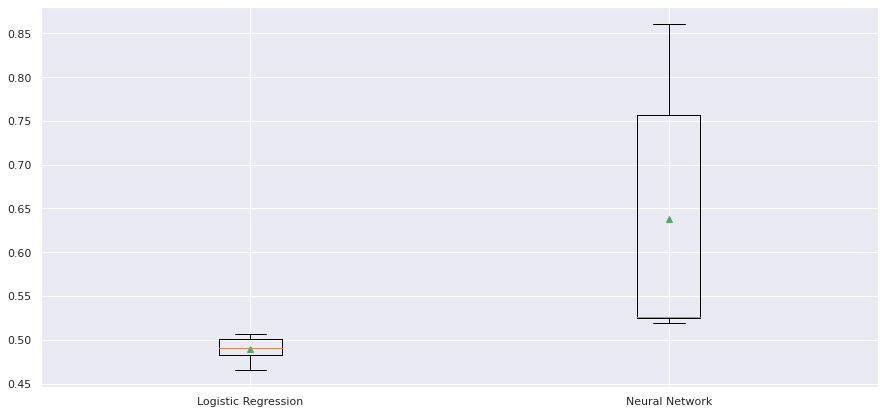

In [ ]:
plt.figure(figsize=(15,7))
plt.boxplot([score1,score2], labels=['Logistic Regression', 'Neural Network'], showmeans=True)
plt.show()

Significance threshold of 0.05 to reject the null hypothesis that both approaches perform equally well on the dataset when we conduct the 5x2 cv _t test.

In [ ]:
from mlxtend.evaluate import paired_ttest_5x2cv
t, p = paired_ttest_5x2cv(estimator1=model1,
                          estimator2=create_model(), 
                          X= X_train_fs, 
                          y= y_train_enc, 
                          scoring='neg_mean_squared_error',
                          random_seed=1)

45/45 [==============================] - 0s 3ms/step - loss: 0.4806 - Accuracy: 0.7594 - precision: 0.5696 - recall: 0.2493


In [ ]:
print('P-value: ', p)
print('t-statistics: ', t)

P-value:  0.039372119608851425
t-statistics:  2.7698541980337446


**<h2>4. Concept drift detection<h2>**

**On Continues Churn Variable**

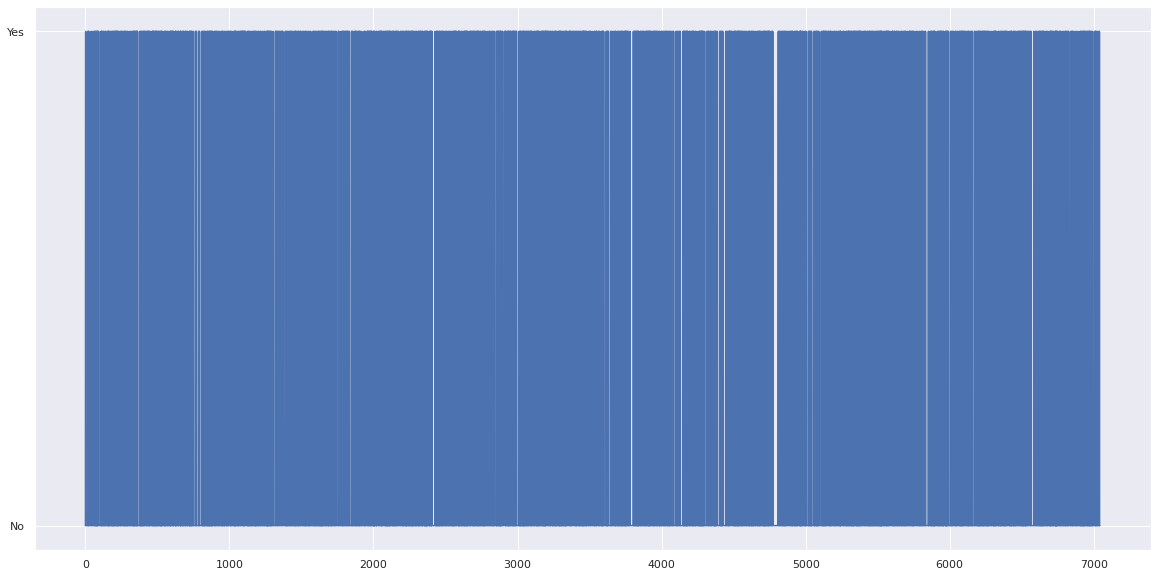

In [ ]:
#Take the target value Churn to check for the concept drift
drift_stream = data['Churn']
#Plot the graph
plt.figure(figsize=(20, 10))
plt.plot(drift_stream)
# instantiate ADWIN object
adwin = ADWIN(delta=.0002)
# for each data point in stream

for i in range(drift_stream.size):
  # adwin.add_element(drift_stream[i])
  # if adwin detects change, print at what point in the stream
  # the change was detected
  if adwin.detected_change():
    print('Change detected at index {}'.format(i))


**On Continues TotalCharges Variable**

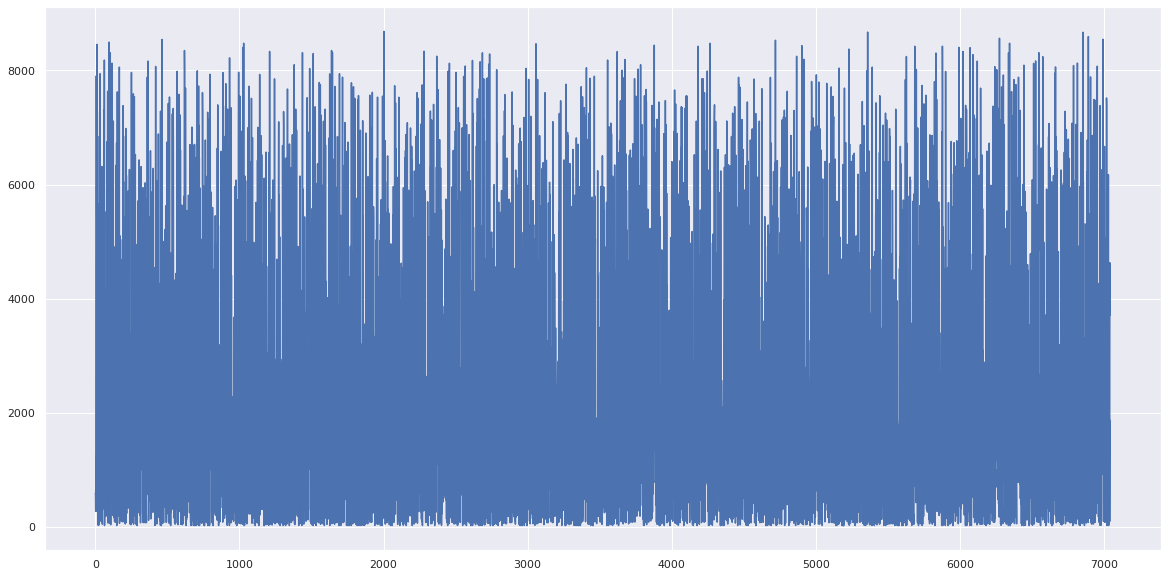

In [ ]:
#Take the target value Churn to check for the concept drift
drift_stream = data['TotalCharges']
#Plot the graph
plt.figure(figsize=(20, 10))
plt.plot(drift_stream)
# instantiate ADWIN object
adwin = ADWIN(delta=.0002)
# for each data point in stream

for i in range(drift_stream.size):
  adwin.add_element(drift_stream[i])
  # if adwin detects change, print at what point in the stream
  # the change was detected
  if adwin.detected_change():
    print('Change detected at index {}'.format(i))

**On Continues MonthlyCharges Variable**

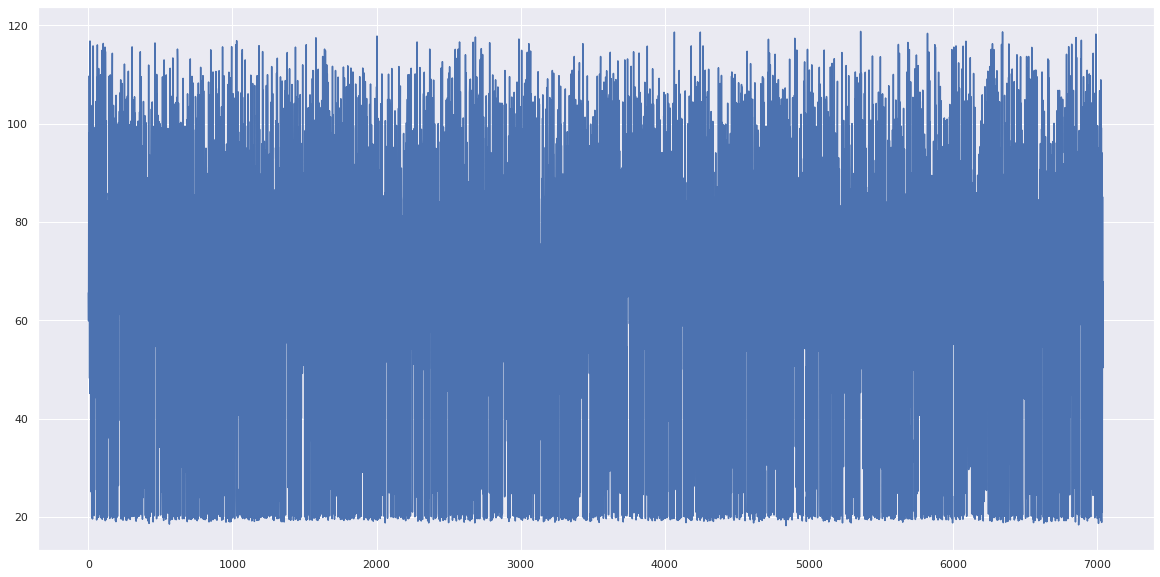

In [ ]:
#Take the target value Churn to check for the concept drift
drift_stream = data['MonthlyCharges']
#Plot the graph
plt.figure(figsize=(20, 10))
plt.plot(drift_stream)
# instantiate ADWIN object
adwin = ADWIN(delta=.0002)
# for each data point in stream

for i in range(drift_stream.size):
  adwin.add_element(drift_stream[i])
  # if adwin detects change, print at what point in the stream
  # the change was detected
  if adwin.detected_change():
    print('Change detected at index {}'.format(i))

**On Continues SeniorCitizen Variable**

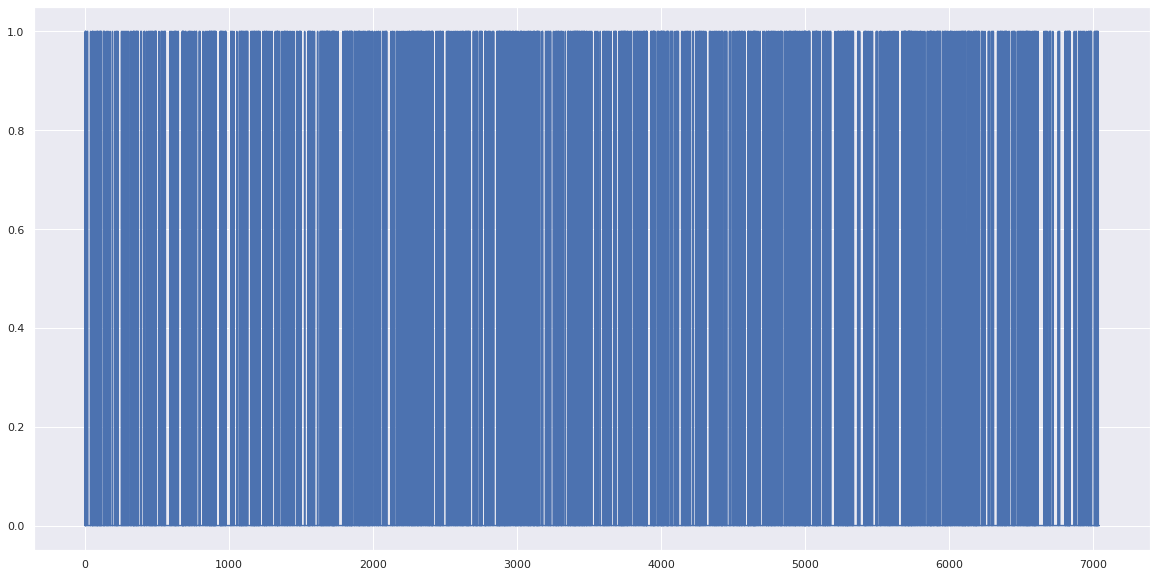

In [ ]:
#Take the target value Churn to check for the concept drift
drift_stream = data['SeniorCitizen']
#Plot the graph
plt.figure(figsize=(20, 10))
plt.plot(drift_stream)
# instantiate ADWIN object
adwin = ADWIN(delta=.0002)
# for each data point in stream

for i in range(drift_stream.size):
  adwin.add_element(drift_stream[i])
  # if adwin detects change, print at what point in the stream
  # the change was detected
  if adwin.detected_change():
    print('Change detected at index {}'.format(i))

**On Continues tenure Variable**

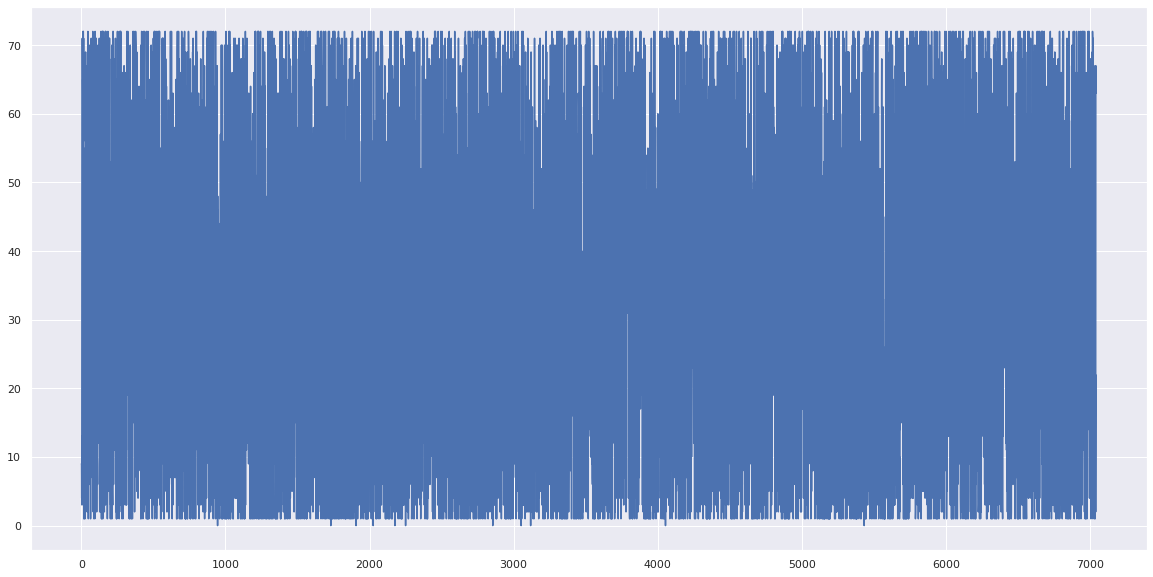

In [ ]:
#Take the target value Churn to check for the concept drift
drift_stream = data['tenure']
#Plot the graph
plt.figure(figsize=(20, 10))
plt.plot(drift_stream)
# instantiate ADWIN object
adwin = ADWIN(delta=.0002)
# for each data point in stream

for i in range(drift_stream.size):
  adwin.add_element(drift_stream[i])
  # if adwin detects change, print at what point in the stream
  # the change was detected
  if adwin.detected_change():
    print('Change detected at index {}'.format(i))

We utilised the ADWIN as a concept drift detection technique in the example above. The goal value Churn was used as an input for the data stream, and its graph was created. We may infer from the graph that there is no exceptional data drift. As you can see, the detection method (ADWIN, which we also employed for drift detection) is unable to identify any changes in the data stream.

References:

<br>

[1] "IMPROVE MACHINE LEARNING MODEL PERFORMANCE -with Hyper-parameter tuning", Medium, 2022. [Online]. Available: https://puneet166.medium.com/improve-your-machine-learning-model-performance-with-hyperparameter-tuning-80ab13a03d5e. [Accessed: 02- Jul- 2022].
[2] J. Brownlee, "How to Perform Feature Selection with Categorical Data", Machine Learning Mastery, 2022. [Online]. Available: https://machinelearningmastery.com/feature-selection-with-categorical-data/. [Accessed: 03- Jul- 2022].

[3]"Feed Forward Neural Networks — How to Successfully Build Them in Python", Medium, 2022. [Online]. Available: https://towardsdatascience.com/feed-forward-neural-networks-how-to-successfully-build-them-in-python-74503409d99a. [Accessed: 06- Jul- 2022].

[4] S. Team, "How to use cross_val_score for Cross Validation in Keras", SETScholars: Coding and Math Resources, 2022. [Online]. Available: https://setscholars.net/how-to-use-cross_val_score-for-cross-validation-in-keras/. [Accessed: 10- Jul- 2022].

[5] Y. Santhush, "ValueError: The first argument to `Layer.call` must always be passed. for k Fold validation", Data Science Stack Exchange, 2022. [Online]. Available: https://datascience.stackexchange.com/questions/109106/valueerror-the-first-argument-to-layer-call-must-always-be-passed-for-k-fold. [Accessed: 10- Jul- 2022].

[6]"skmultiflow.drift_detection.ADWIN — scikit-multiflow 0.5.3 documentation", Scikit-multiflow.readthedocs.io, 2022. [Online]. Available: https://scikit-multiflow.readthedocs.io/en/stable/api/generated/skmultiflow.drift_detection.ADWIN.html. [Accessed: 11- Jul- 2022].
